In [7]:
import os
import sys

par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)

In [8]:
import numpy as np

In [9]:
run = 7

In [10]:
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

In [11]:
label_dict_1 = {"gamma":0, "e":1}
label_dict_2 = {"gamma":0, "mu":2}
label_dict_3 = {"e":1, "muon":2}

label_dict_all = {"gamma":0, "e":1, "mu":2}

In [12]:
%matplotlib inline

# Plot the softmax histogram

In [ ]:
from plot_utils.plot_utils import plot_softmax_histogram

In [ ]:
plot_softmax_histogram(softmax5, label5, labels_dict={"gamma":0, "e":1},
                       particle="gamma", save_path=None, num_bins=50)

In [ ]:
plot_softmax_histogram(softmax5, label5, labels_dict=label_dict_all,
                       particle="e", save_path=None, num_bins=100)

In [ ]:
plot_softmax_histogram(softmax5, label5, labels_dict=label_dict_all,
                       particle="mu", save_path=None, num_bins=100)

# Plot the particle softmax histogram

In [ ]:
from plot_utils.plot_utils import plot_particle_histogram

In [ ]:
plot_particle_histogram(softmax5, label5, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

In [ ]:
plot_particle_histogram(softmax5, label5, labels_dict={"gamma":0, "e":1}, particle="e")

In [ ]:
plot_particle_histogram(softmax5, label5, labels_dict={"e":1, "mu":2}, particle="e")

In [ ]:
plot_particle_histogram(softmax5, label5, labels_dict={"gamma":0, "mu":2}, particle="gamma", num_bins=50)

In [ ]:
plot_particle_histogram(softmax5, label5, labels_dict={"gamma":0, "e":1, "mu":2}, particle="mu")

In [ ]:
from plot_utils.plot_utils import plot_ROC_curve
plot_ROC_curve(softmax5, label5, class_dict={"gamma":0, "e":1, "mu":2})

# Segmentation by energies

In [15]:
energies = energies.reshape(energies.shape[0]*energies.shape[1], -1)
print(energies.shape)

(90000, 1)


In [16]:
print(labels.shape)

(90000,)


In [17]:
print(np.amax(energies))

1264.3239


In [18]:
print(np.amin(energies))

101.30354


In [19]:
print(np.amax(labels))

2


# Plotting energies

(array([0.00071318, 0.00069598, 0.00069025, 0.00072465, 0.00070745,
        0.00071939, 0.00069121, 0.00069742, 0.00071891, 0.0007127 ,
        0.00073611, 0.00100552, 0.001113  , 0.00107431, 0.00109819,
        0.00107765, 0.00110202, 0.00112829, 0.00115265, 0.00114644,
        0.0011259 , 0.00114453, 0.00114835, 0.00111062, 0.00112972,
        0.00108243, 0.00114453, 0.00109294, 0.00111969, 0.00112399,
        0.00113497, 0.00115074, 0.00110631, 0.00114405, 0.00113259,
        0.00114979, 0.00111921, 0.00110632, 0.00090139, 0.00038215,
        0.00036161, 0.00039027, 0.0003745 , 0.00036638, 0.00037498,
        0.00036973, 0.00037164, 0.00036352, 0.00037928, 0.00038406]),
 array([ 101.30354,  124.56395,  147.82436,  171.08476,  194.34517,
         217.60558,  240.86598,  264.12637,  287.38678,  310.6472 ,
         333.9076 ,  357.168  ,  380.4284 ,  403.6888 ,  426.94922,
         450.20963,  473.47003,  496.73044,  519.99084,  543.2513 ,
         566.51166,  589.7721 ,  613.0325 ,  6

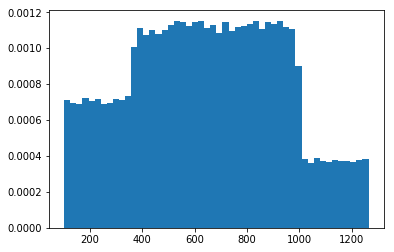

In [20]:
import matplotlib.pyplot as plt
plt.hist(energies, bins=50, density=True)

## Plotting enegies w.r.t. the particles

In [22]:
energies_dict = {}
for label in np.unique(labels):
    energies_dict[label] = energies[labels==label]

In [35]:
for label in energies_dict.keys():
    print(len(energies_dict[label]))

30012
29938
30050


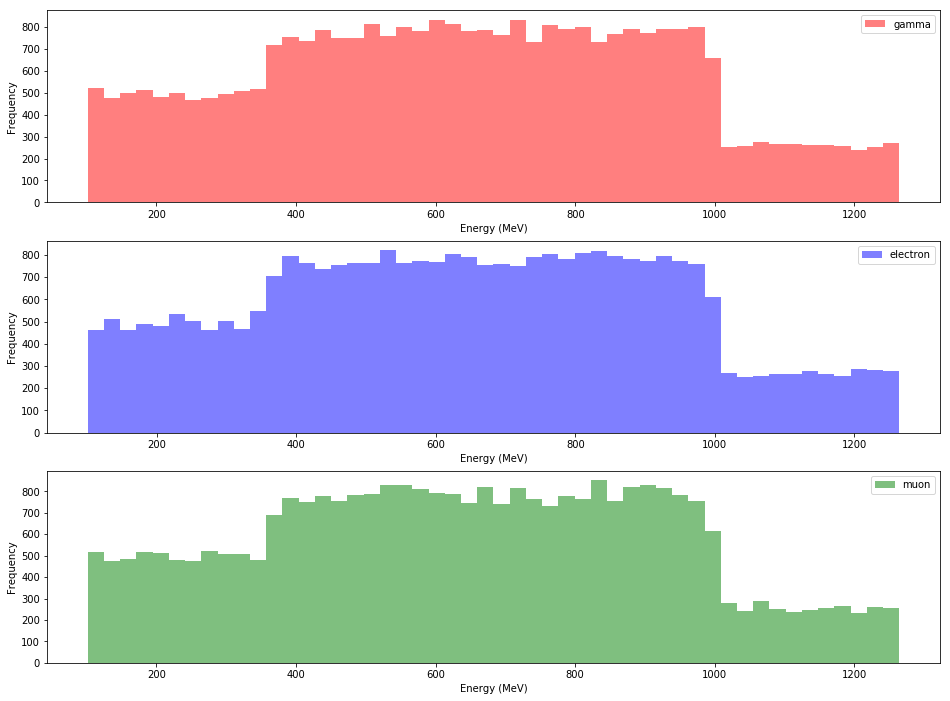

In [39]:
label_dict = {0:["gamma","red"], 1:["electron","blue"], 2:["muon","green"]}
fig, axes = plt.subplots(3,1,figsize=(16,12))

for label in energies_dict.keys():
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_dict[label][0], alpha=0.5,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")

In [71]:
import math
max_iter = math.ceil(np.amax(energies6)/200)

In [72]:
print(max_iter)

7


In [73]:
energy_threshold = 200
energy_slice_maps = []

for curr in range(max_iter):
    
    energy_slice_map = [False for i in range(len(energies))]
    
    for i in range(len(energies)):
        if(energies[i] > energy_threshold*curr and energies[i] < energy_threshold*curr+energy_threshold):
                energy_slice_map[i] = True

    energy_slice_maps.append(energy_slice_map)

# Segmenting by energies

# 100 - 200 MeV

In [74]:
energy_slice_map = energy_slice_maps[0]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

In [75]:
print(curr_softmax.shape)
print(curr_label.shape)

(6263, 3)
(6263,)


In [76]:
from plot_utils.plot_utils import plot_particle_histogram

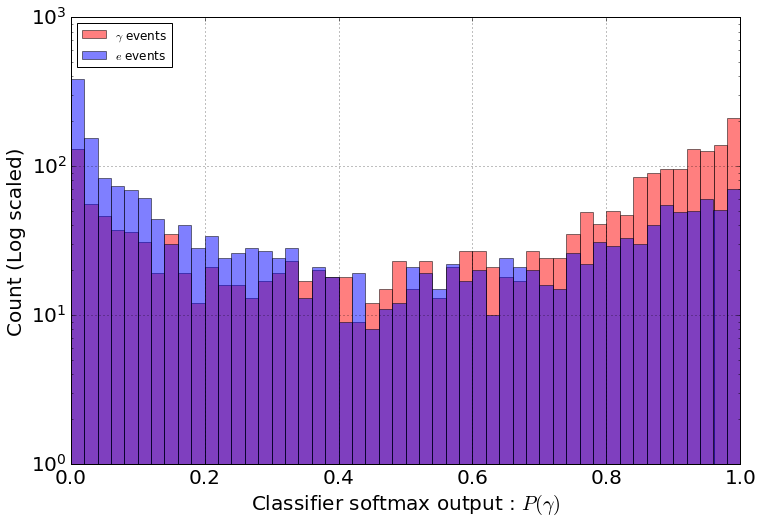

In [77]:
plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

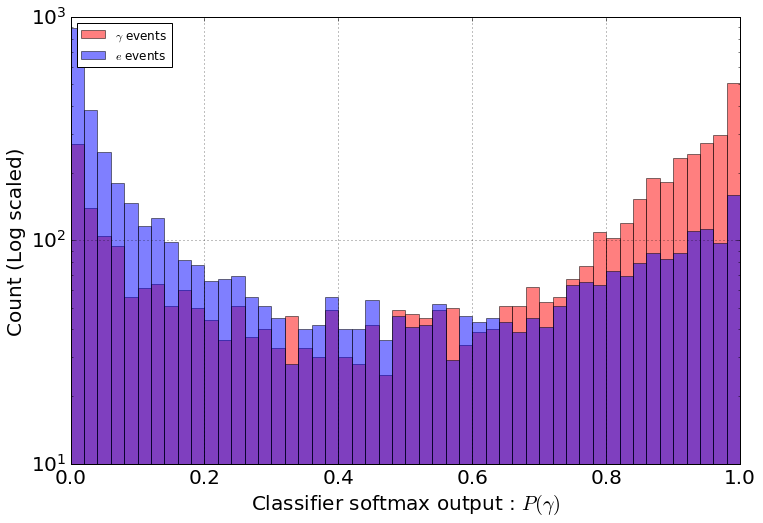

In [78]:
energy_slice_map = energy_slice_maps[1]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

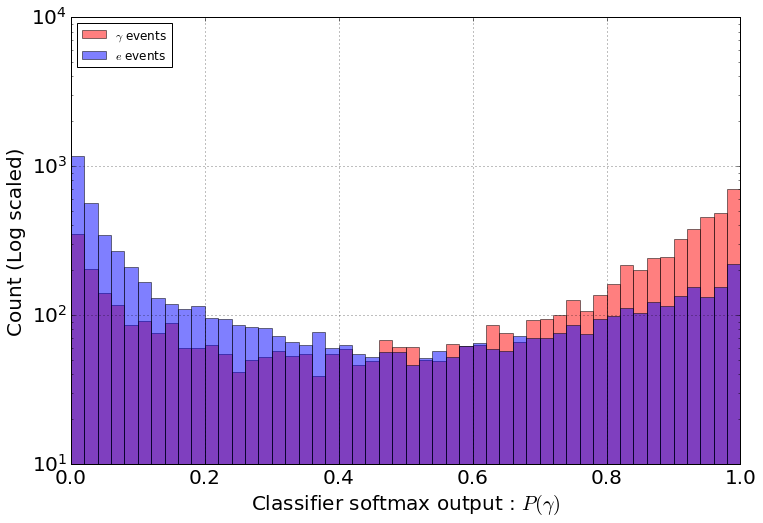

In [79]:
energy_slice_map = energy_slice_maps[2]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

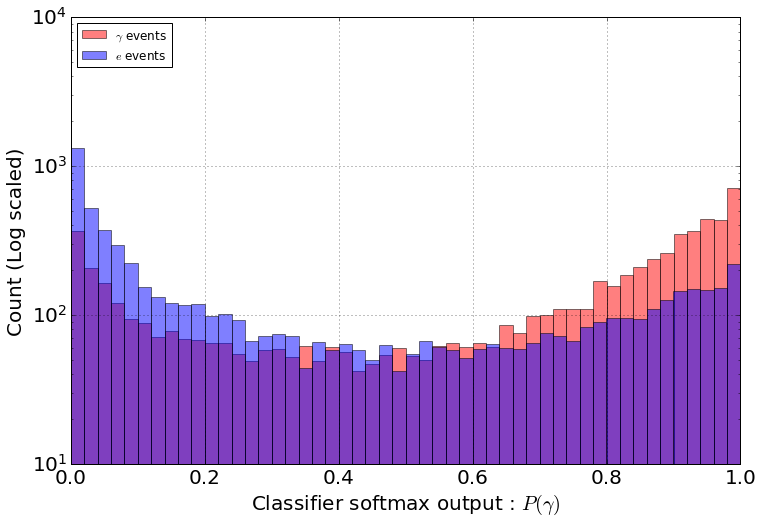

In [80]:
energy_slice_map = energy_slice_maps[3]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

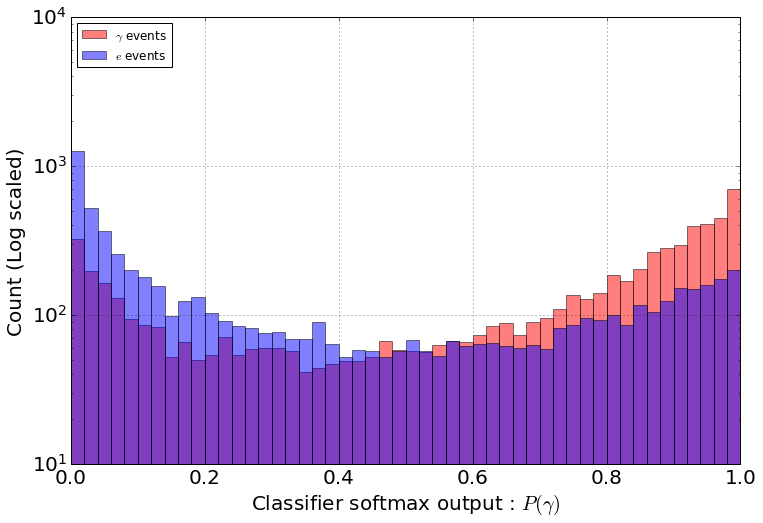

In [81]:
energy_slice_map = energy_slice_maps[4]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

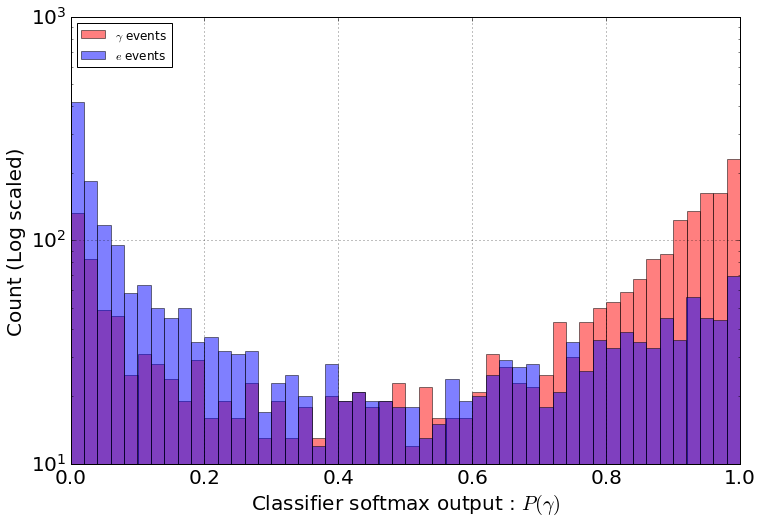

In [82]:
energy_slice_map = energy_slice_maps[5]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

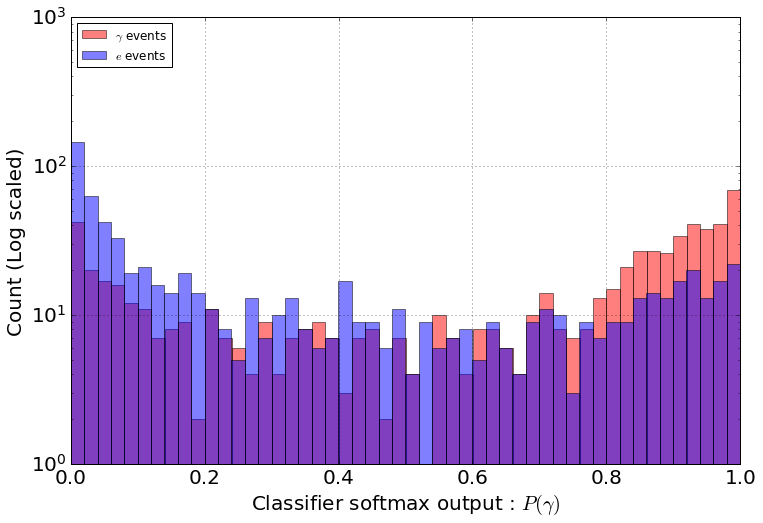

In [83]:
energy_slice_map = energy_slice_maps[6]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]

plot_particle_histogram(curr_softmax, curr_label, labels_dict={"gamma":0, "e":1}, particle="gamma", num_bins=50)

In [84]:
from plot_utils.plot_utils import plot_ROC_curve

In [85]:
class_dict = {"gamma":0, "e":1, "mu":2}

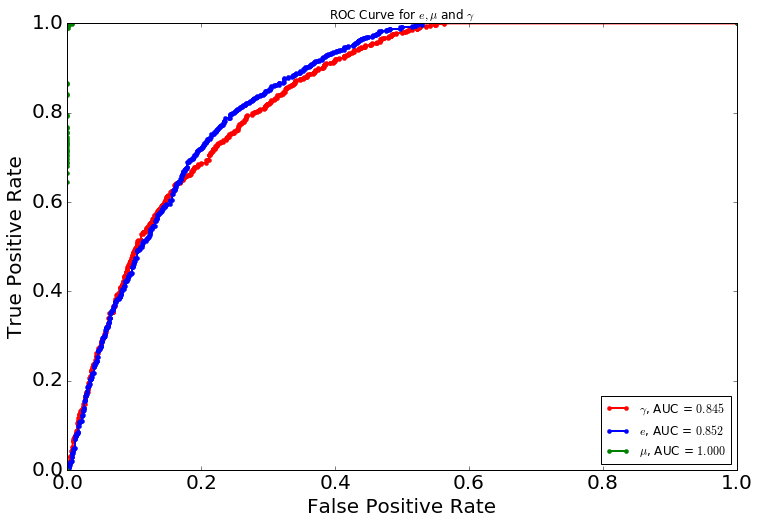

In [87]:
energy_slice_map = energy_slice_maps[6]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

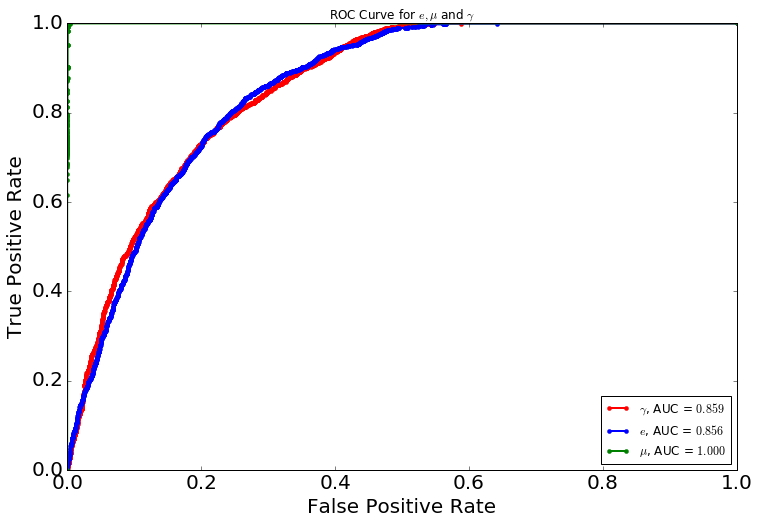

In [89]:
energy_slice_map = energy_slice_maps[5]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

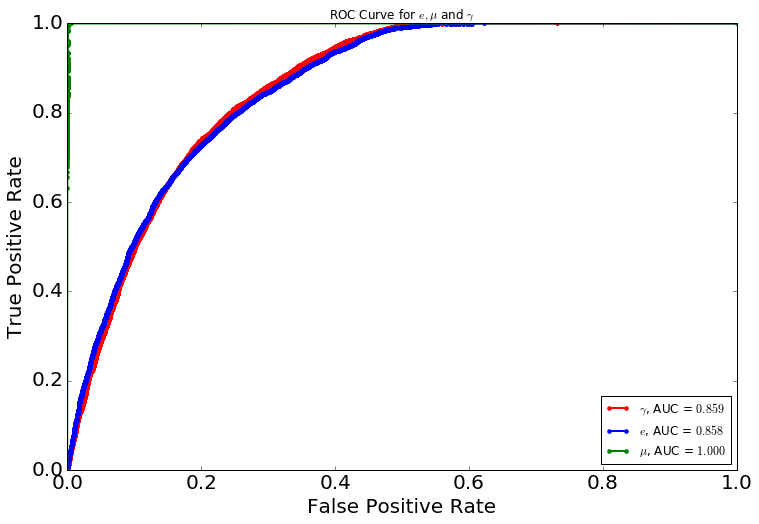

In [90]:
energy_slice_map = energy_slice_maps[4]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

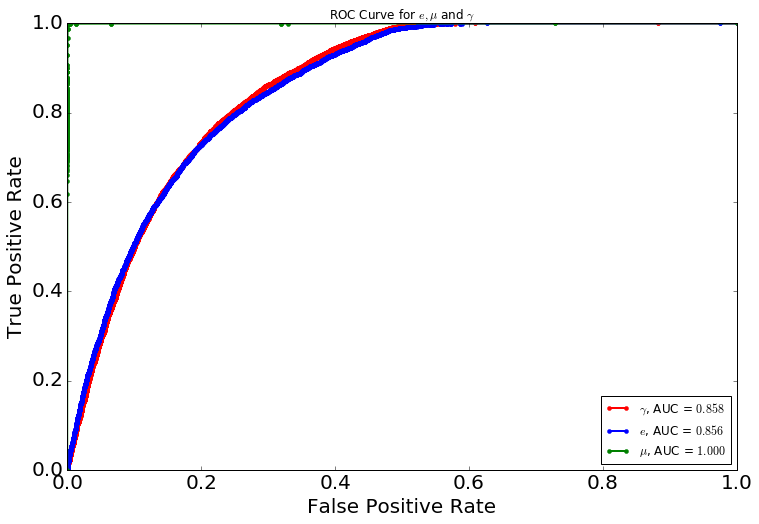

In [91]:
energy_slice_map = energy_slice_maps[3]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

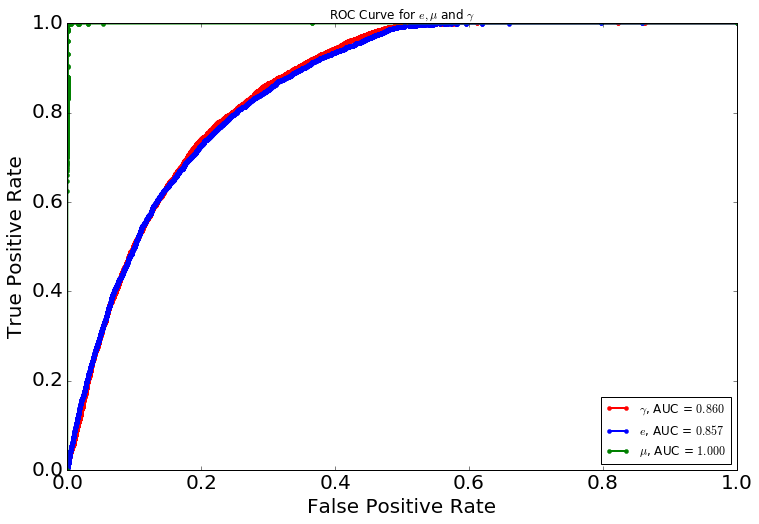

In [92]:
energy_slice_map = energy_slice_maps[2]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

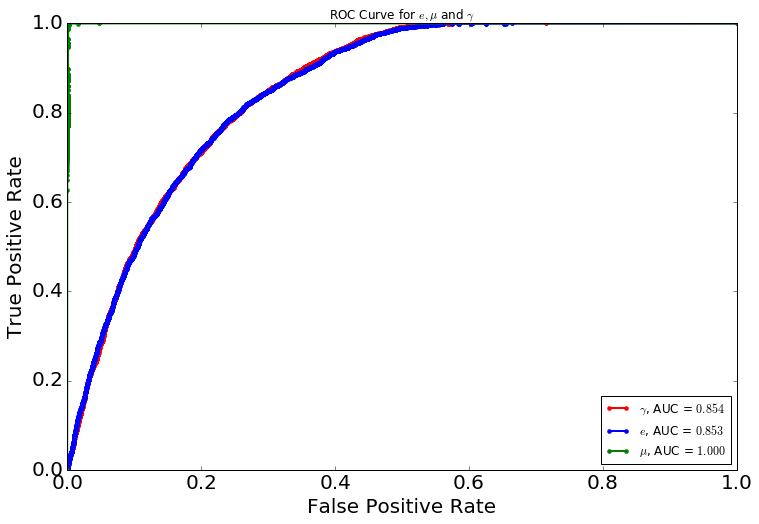

In [93]:
energy_slice_map = energy_slice_maps[1]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)

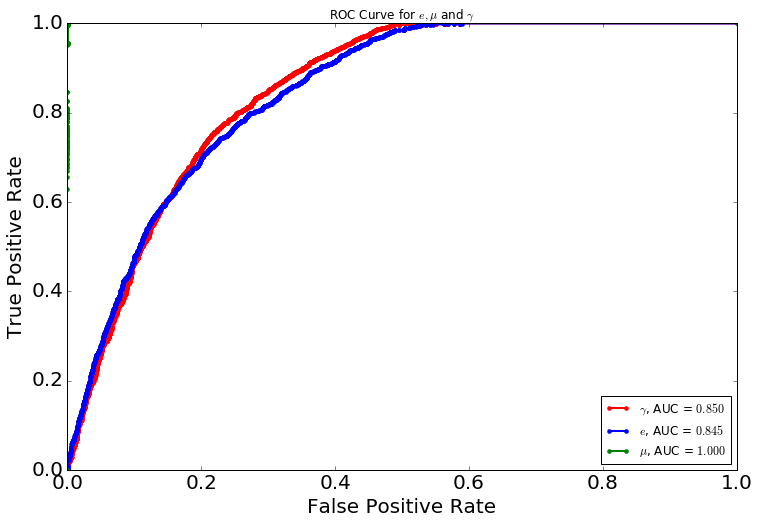

In [94]:
energy_slice_map = energy_slice_maps[0]
curr_softmax = softmaxes[energy_slice_map]
curr_label = labels[energy_slice_map]
plot_ROC_curve(curr_softmax, curr_label, class_dict)